# NLP CLASSIFIER

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('nlp_data.csv')
data.head()

,title,content,label
0,Myths and facts about wheezing in children und...,Wheezing is a widespread problem in children u...,parenting
1,A guide to supporting teens through anxiety,"These days, anxiety has become a part of our d...",parenting
2,How you can help your teen tackle Board examin...,The board season is here! Stress is at an all-...,parenting
3,How to detect if your teen has Borderline Pers...,Being a teenager is difficult. Teens go throug...,parenting
4,Here’s Everything You Need to Know About Prega...,Stomach pain during pregnancy can happen for v...,parenting


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    900 non-null    object
 1   content  900 non-null    object
 2   label    900 non-null    object
dtypes: object(3)
memory usage: 21.2+ KB


In [4]:
data.duplicated().sum()

0

## Text Cleaning

In [5]:
import re
import string
from nltk.corpus import stopwords

In [6]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
def text_process(text):
    clean_rev = re.sub(r"\n","",text)
    clean_rev = [char for char in clean_rev if char not in string.punctuation]
    clean_rev = ''.join(clean_rev)
    clean_rev = " ".join(word for word in clean_rev.split() if word.lower() not in stopwords.words('english'))
    return clean_rev

In [10]:
data['cleaned_text'] = data['content'].apply(text_process)
data.head()

,title,content,label,cleaned_text
0,Myths and facts about wheezing in children und...,Wheezing is a widespread problem in children u...,parenting,Wheezing widespread problem children 5 years o...
1,A guide to supporting teens through anxiety,"These days, anxiety has become a part of our d...",parenting,days anxiety become part daily conversations a...
2,How you can help your teen tackle Board examin...,The board season is here! Stress is at an all-...,parenting,board season Stress alltime high WiFi running ...
3,How to detect if your teen has Borderline Pers...,Being a teenager is difficult. Teens go throug...,parenting,teenager difficult Teens go many changes inclu...
4,Here’s Everything You Need to Know About Prega...,Stomach pain during pregnancy can happen for v...,parenting,Stomach pain pregnancy happen various reasons ...


## Word Cloud

In [11]:
from textblob import TextBlob
from wordcloud import WordCloud

In [12]:
combined = " ".join(word for word in data['cleaned_text'])  

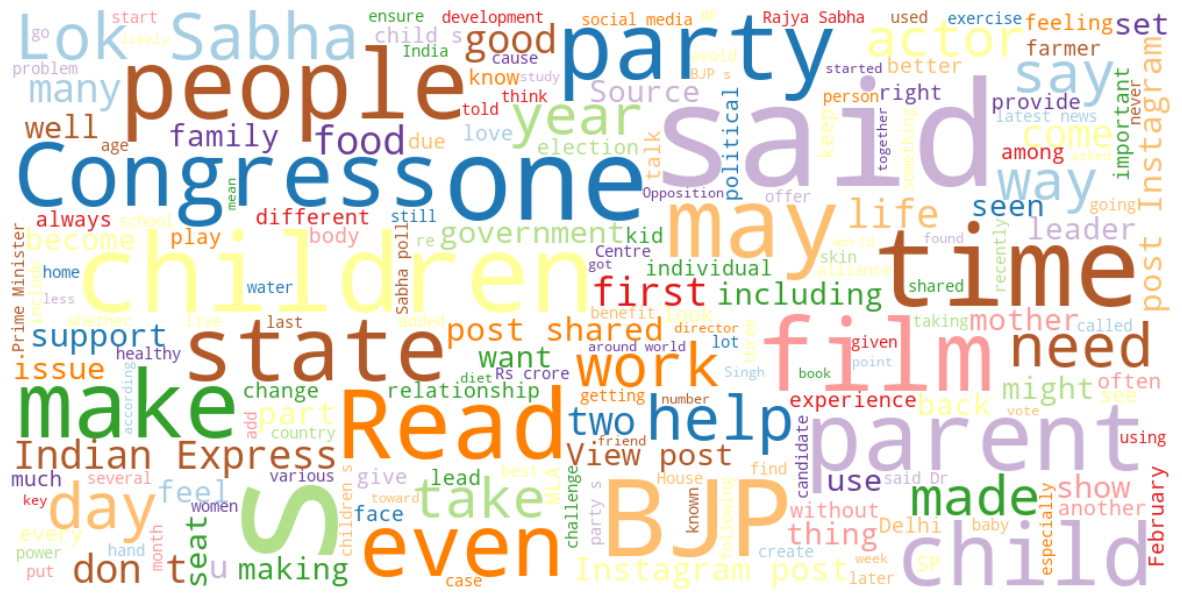

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
wordcloud = WordCloud(width=1000,height = 500,random_state=20,max_font_size=150,background_color= 'white',colormap='Paired_r').generate(combined)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# Clustering

In [14]:
cluster_data = data.drop(['title','content','label'],axis=1)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans,KMeans
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cluster_data.cleaned_text.values)

In [16]:
clust = KMeans(init='k-means++',n_clusters=4,n_init=10)

In [17]:
clust.fit(X)

KMeans(n_clusters=4, n_init=10)

In [18]:
predictions = clust.predict(X)

In [19]:
cluster_data['cluster_labels'] = clust.labels_

In [20]:
cluster_data.head()

,cleaned_text,cluster_labels
0,Wheezing widespread problem children 5 years o...,3
1,days anxiety become part daily conversations a...,3
2,board season Stress alltime high WiFi running ...,3
3,teenager difficult Teens go many changes inclu...,3
4,Stomach pain pregnancy happen various reasons ...,3


In [21]:
cluster_data['cluster_labels'].value_counts()

cluster_labels
2    292
3    234
0    220
1    154
Name: count, dtype: int64

# Text Classification

In [23]:
X = vectorizer.fit_transform(data['cleaned_text'].values).toarray()
y = data['label']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [27]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for idx, accuracy in enumerate(accuracies):
    entries.append((model_name, idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'idx', 'accuracy'])

e:\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
e:\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
e:\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
e:\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
e:\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will c

# Model Selection

In [28]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
mean_accuracy

model_name
LinearSVC                 0.968889
LogisticRegression        0.960000
MultinomialNB             0.914444
RandomForestClassifier    0.931111
Name: accuracy, dtype: float64

In [29]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

e:\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [30]:
print('\t\t\CLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= data['label'].unique()))

		\CLASSIFICATIION METRICSn
                precision    recall  f1-score   support

     parenting       0.97      1.00      0.98        57
      politics       0.94      0.94      0.94        72
     lifestyle       0.97      0.93      0.95        61
entertainmaent       1.00      1.00      1.00        80

      accuracy                           0.97       270
     macro avg       0.97      0.97      0.97       270
  weighted avg       0.97      0.97      0.97       270



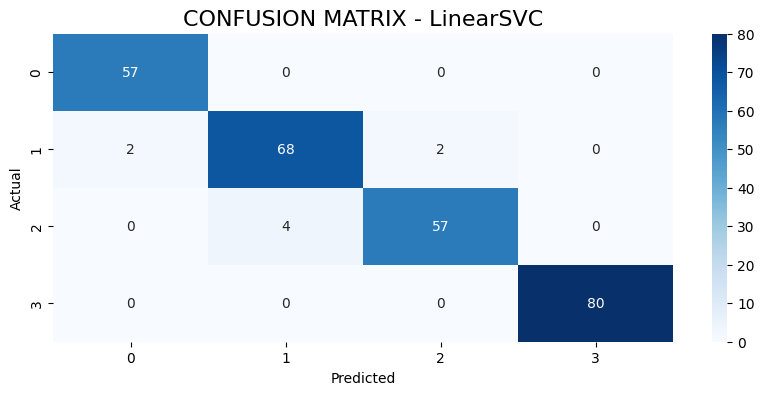

In [31]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(conf_mat, annot=True,cmap='Blues', fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC", size=16);

# Predicting the Class

In [32]:
text ='Wheezing widespread problem children 5 years old India According American Academy Paediatrics 50 children would least one episode wheezing 5 years age child wheezes first question happens one’s mind whether child asthma whether require medicines long duration article let’s discuss myths facts wheezing treatment children 5 yearsMyth 1 wheezing asthmaFact fact viral infections common cause wheezing children five years age 60 children experience recurrent wheezing age 5 stop wheezing won’t develop asthma age However there’s family history asthma allergyrelated skin disease child may continue wheeze even age 5Myth 2 Inhalers harmful addictive used childrenFacts Inhalers safe nonaddictive medication used children relieve control asthma symptoms long run considered lifeline wheezing children used firstline medication prescribed doctor instead syrups tablets recommendation supported international organizations Global Initiative Asthma GINA children age 5Myth 3 Inhalers used children similar given adults lead overdosageFact Aerosol delivery devices adults children However dosage frequency use may differ based age severity wheeze Also amount drug deposited lungs depends upon breathing capacity person Adult lungs handle air volume resulting medication deposited dosage Pediatric lungs smaller receive less medication important consult doctor appropriate dosage control symptomsMyth 4 Inhalers contain steroids harm child growth developmentFact Inhalers contain steroids microgram doses 1000 times less dose syrups tablet steroids given wheeze exacerbations Inhalers like ointments drug gets deposited surface action required oral medications taken get absorbed intestines blood resulting delivery drug body parts action intended Hence side effects inhalers less compared oral medicationsMyth 5 Inhalers used severe cases wheezingFact Inhalers medications relieve also prevent recurrent wheezing long run Even child mild persistent asthma symptoms controllable inhalers oral medications standard careMyth 6 Inhalers cure asthmaFact Inhaler medications classified two categories – relievers controllers Relievers used alleviate wheezing controllers given prevent recurrent wheezing children Asthma allergy managed medications avoidance triggers It’s important note control possible cure However previously mentioned article children experience wheezing age 5 affected allergies asthma symptoms may improve age 6Myth 7 Nebulizers better inhalers used homeFact Nebulizers helpful sick children difficulty breathing wheezing However children breathing problems inhalers enough provide relief safe use nebulizers home children 5 years old using home machines without oxygen lead decrease oxygen levels unconsciousness Instead inhalers used home improvement inhalers important consult pediatrician go emergency room treatmentIn conclusion wheezing children mostly due viral infections Inhalers safe effective way manage wheeze children 5 years age essential help build awareness inhalers form important way wheeze treated Parents caregivers consult child’s doctor ensure child using inhalers correctly effectively Dr Karthik Narayanan R MD Pediatrics DM Pediatric critical care Emergency MedicineSenior Consultant Rainbow Children’s Hospital ChennaiDr Karthik Narayanan RMD Pediatrics DM Pediatric critical care Emergency Medicine Senior Consultant Rainbow Children’s Hospital ChennaiDisclaimerThis content sponsored reflect views opinions IE Online Media Services Pvt Ltd journalist involved creating sponsored material imply endorsement whatsoever editorial team IE Online Media Services takes responsibility content appears sponsored articles consequences thereof directly indirectly manner Viewer discretion advised'

In [33]:
vect_text = vectorizer.transform([text])
result = model.predict(vect_text)[0]

In [34]:
print(f"The text belongs to the category: {result}")

The text belongs to the category: parenting


# Saving the model as pickle file

In [39]:
import pickle
with open('text_model.pkl','wb') as file:
    pickle.dump(model,file)